<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_10_30_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_MachineLearningGuide(p_290_319).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀 소개
- 회귀: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
---
- 단일회귀: 독립변수 1개
- 다중회귀: 독립변수 여러개
- 선형회귀: 회귀 계수의 결합이 선형적
- 비선형회귀:회귀 계수의 결합이 비선형적
---
#### 지도학습(분류+회귀)
- 분류: 예측값이 categorical한 이산형 클래스 값
- 회귀: 예측값이 numeric한 연속형 숫자 값
---
#### 대표적 선형회귀 모델
- 일반선형회귀: 예측값과 실제 값의 RSS(Residual Sum of Square)를 최소화할 수 있도록 회귀계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
- 릿지(Ridge) : 선형회귀에 L2규제를 적용한 방식.
      L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.
- 라쏘(Lasso): 선형회귀에 L1규제를 적용한 방식.
      L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해 L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.
- 엘라스틱넷(ElasticNet) : L2,L1규제를 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용. L1규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정한다.
- 로지스틱 회귀(Logistic Regression): 로지스틱 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형모델입니다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측성능을 보인다




# 2. 단순 선형 회귀를 통한 회귀 이해
- 단순선형 회귀: 독립변수1개, 종속변수1개의 선형회귀
- Y_hat = W0 + W1*X         (predcited된 Y값. 예측값이라고도 한다)
- Y =  W0 + W1*X + 오류값   (실제 Y값)
- sum(오류값) =0
- sum(오류값^2) = RSS
- 회귀에서 RSS는 비용(Cost)이며 w변수(회귀계수)로 구성되는 RSS를 비용함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값(즉 오류값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 오류값을 구하는 것이다. 비용 함수를 loss function(손실함수)이라고도 한다.

# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
- 비용함수가 최소가 되는 W파라미터는 경사하강법을 통해 구할 수 있다.
- 경사하강법: 고차원 방정식에 대한 문제를 해결. RSS를 최소화하는 방법을 직관적으로 제공하는 방식. 점진적으로 반복적인 계산을 통해 w파라미터 값을 업데이트하면서 오류값이 최소가 되는 W파라미터를 구하는 방식이다.반복적으로 비용함수의 반환값, 즉 (예측값과 실제값의 차이)오류가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나간다. 이 때 최초 w에서부터 미분을 적용한 뒤 이 미분값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 오류값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W값을 최적 파라미터로 반환한다. 이것은 미분된 1차함수의 기울기가 감소하지 않는 지점이기도 하다
- 학습률: 위 편미분 값이 너무 클 수 있어 곱하게 되는 보정계수이다
- 경사하강법의 일반적인 프로세스
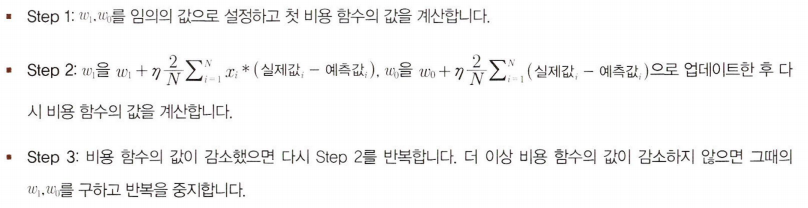

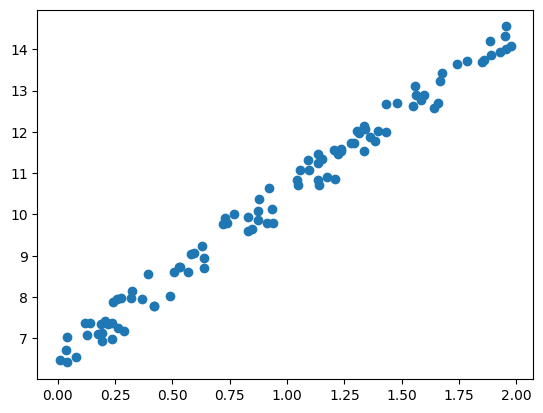

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4X + 6을 근사(W1=4, W0=6), 임의의 값은 노이즈를 위해 만들음
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

# X,y 데이터 세트를 산점도로 시각화
plt.scatter(X,y)

- 위의 데이터 분포는 y=4X+6 그래프를 기준으로 무작위적으로 데이터가 분포한다
- 비용함수 = RSS/N 함수를 정의한다

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost = sum(np.square(y-y_pred))/N
  return cost

get_weight_updates()함수에서 입력 배열 X값에 대한 예측배열 y_pred는 np.dot(X,w1,T)+w0으로 구한다. 100개의 데이터X(1,2,3,...100)이 있다면 예측값은 w0+X(1)xw1 + X(2)xw1 + X(3)xw1 + ..... + X(100)이며, 이는 입력배열 X와 w1배열의 내적과 동일합니다

In [ ]:
# w1,w0을 업데이트 할 w1_update,w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate =0.01):
  N=len(y)
  # 먼저 w1_update,w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T) +w0
  diff = y-y_pred
  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
  return w1_update,w0_update


다음은 get_weight_updates()를 경사하강방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수인 gradient_descent_steps()함수이다

In [ ]:
# 입력 인자 iter로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X,y,iters=1000):
  # w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 w1,w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1,w0

이제 gradient_descent_steps()를 호출해 w1과 w0을 구한다. 최종적으로 예측값과 실제값의 RSS차이를 계산하는 get_cost()함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해 본다

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters = 1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X +w0
print("Gradient Descent Total Cost:{0:.4f}".format(get_cost(y,y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


- 실제 선형식과 유사하게 coefficient가 나옴.
- 예측 오류 비용은 약 0.0775임.

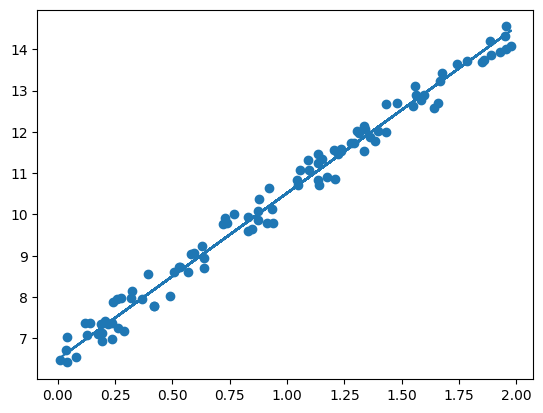

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 일반적으로 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트해 수행시간이 매우 오래 걸린다. 그 때문에 실전에서는 대부분 확률적 경사하강법을 이용한다
- 확률적 경사하강법: w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사하강법에 비해 빠른 속도를 보장한다


In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters =1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost =10000
  iter_index=0
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X,sample_y로 저장
    stochaic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochaic_random_index[0:batch_size]]
    sample_y = y[stochaic_random_index[0:batch_size]]
    # 랜덤하게 barch_size만큼 추출한 데이터 기반으로 w1_update,w0_update 게산 후 업데이트
    w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1,w0

이렇게 만들어진 stochastic_gradient_descent_steps()를 이용해 w1,w0 및 예측 오류 비용을 계산해본다


In [ ]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters =1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print("Stochastic Gradient Descent Total Cost:{0:4f}".format(get_cost(y,y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.077717


미니배치 확률적 경사하강법으로 구한 w0,w1은 경사하강법으로 구한 w0,w1와 큰 차이가 없으며, 예측 오류비율 또한 큰 차이가 없다. 따라서 큰 데이터를 처리할 때는 일반적으로 확률적 경사하강법을 이용한다

# 4. LinearRegression을 이용한 보스턴 주택가격예측
- LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화해 OLS 추정방식으로 구현한 클래스이다.
- LinearRegression 클래스는 fit()메서드로 X,y 배열을 입력받으면 회귀 계수를 coef_ 속성에 저장한다


In [ ]:
# class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize=False, copy_X = True, n_jobs=1)

### 입력 파라미터
1. `fit_intercept` (기본값: `True`):
   - 이 매개변수는 모델이 절편(intercept)을 학습할지 여부를 결정합니다.
   - `True`로 설정하면 모델은 절편을 학습하며, `False`로 설정하면 절편을 학습하지 않습니다. 절편을 학습하지 않을 경우 모델이 원점을 지나는 직선을 학습하게 됩니다.

2. `normalize` (기본값: `False`):
   - 이 매개변수는 특성(독립 변수)의 정규화(normalization) 여부를 결정합니다.
   - `True`로 설정하면 특성들이 평균 0 및 표준편차 1로 정규화됩니다. 이것은 데이터 스케일이 서로 다른 경우 유용할 수 있습니다.

3. `copy_X` (기본값: `True`):
   - 이 매개변수는 입력 데이터를 복사할지 여부를 결정합니다.
   - `True`로 설정하면 입력 데이터를 복사하고, `False`로 설정하면 입력 데이터를 변경합니다. 주로 입력 데이터를 보존하고 싶을 때 사용됩니다.

4. `n_jobs` (기본값: `1`):
   - 이 매개변수는 선형 회귀 모델 학습 시 사용할 CPU 코어의 개수를 지정합니다.
   - 병렬 처리를 지원하기 위해 사용되며, `n_jobs` 값을 늘리면 학습 속도를 높일 수 있습니다. 만약 `-1`로 설정하면 사용 가능한 모든 코어를 사용하게 됩니다.
---
### 속성
1. coef_
  - fit() 메서드를 수행했을 때 회귀계수가 배열 형태로 저장하는 속성. Shape는 (Target값 개수, 피처 개수)
  - intercept_: intercept값
---
### 회귀 평가 지표
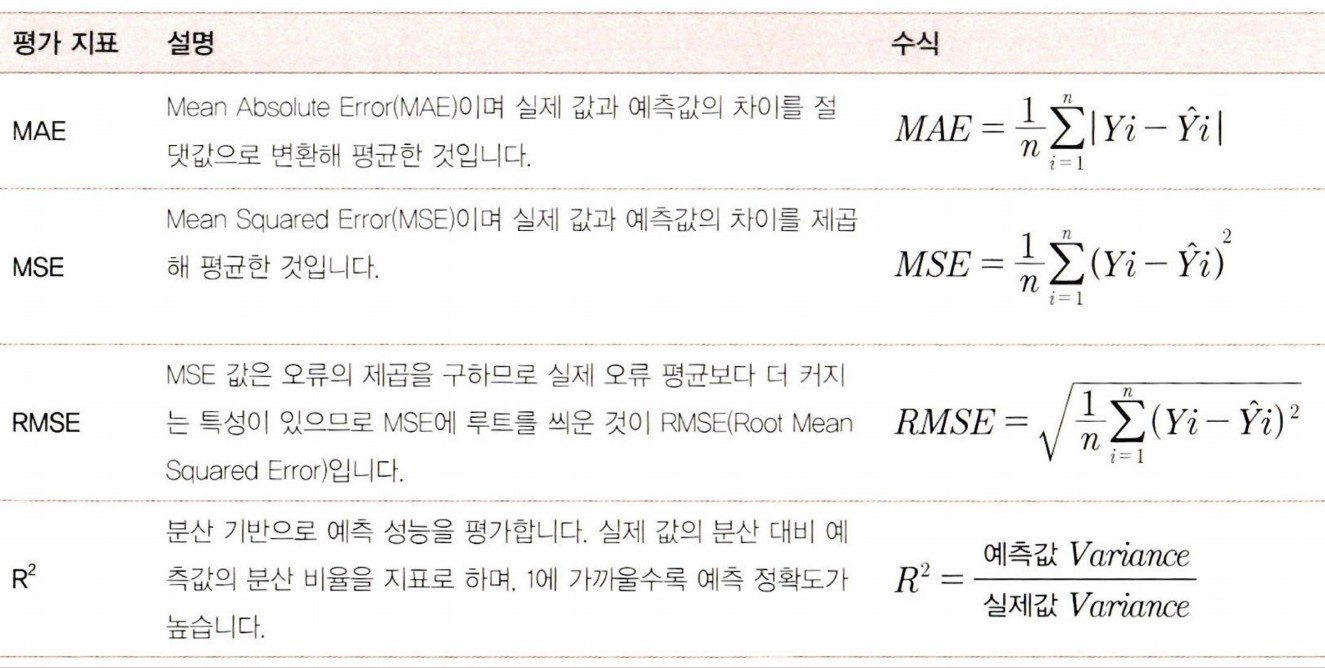



##### 사이킷런 평가 지표
- mae: metrics.mean_absolute_error
- mse: metrics.mean_squared_error
- R^2:metrics.r2_score
---
##### Scoring 함수 적용 값
- mae: neg_mean_absolute_error
- mse: neg_mean_squared_error
- R^2: r2
---
scoring 함수가 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 떄문이다. 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다.
따라서, -1을 원래의 평가지표에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

###  LinearRegression을 이용한 보스턴 주택가격 회귀 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
#from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
#boston = load_boston()
#bostonDF = pd.DataFrame(boston.data, columns = boston.feauture_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE칼럼으로 DataFrame에 추가함
#bostonDF["Price"] = boston.target
#print("boston 데이터셋 크기:", bostonDF.shape)
#bostonDF.head()

raw_df = pd.read_csv( "http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
# boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
boston = result = pd.concat([pd.DataFrame(raw_df.values[::2, :]),pd.DataFrame(raw_df.values[1::2, :3])],axis=1)
feature_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
boston.columns =  columns=feature_names
print('Boston 데이터 세트 크기:', bostonDF.shape)
boston.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


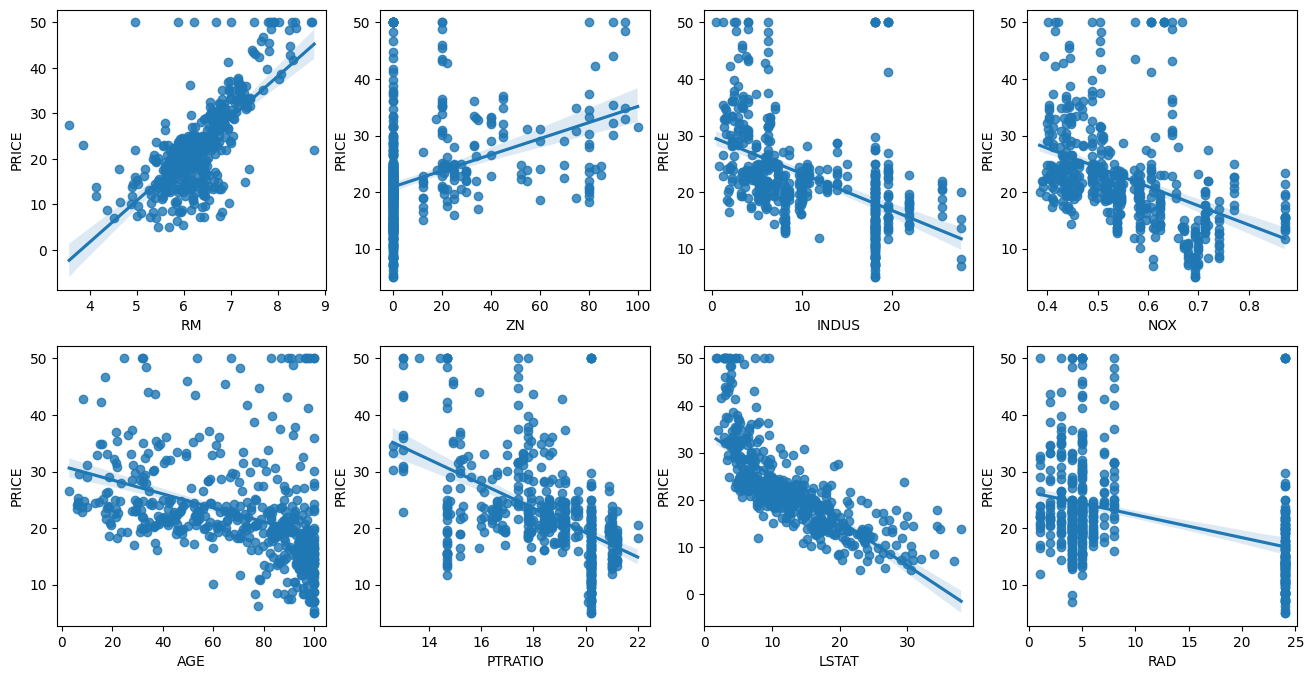

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # seaborn의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표시
  sns.regplot(x=feature,y="PRICE",data=boston, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남을 알 수 있다. 이제 LinearRegression클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들어보자

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

y_target = boston["PRICE"]
X_data = boston.drop(["PRICE"],axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds= lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print("MSE:{0:.3f}, RMSE:{1:.3f}".format(mse,rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test,y_preds)))
print("절편 값:",lr.intercept_)
print("회귀계수 값:", np.round(lr.coef_,1))

MSE:17.297, RMSE:4.159
Variance score: 0.757
절편 값: 40.995595172164826
회귀계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해 본다.

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 -값이 너무 커 포인다. 최적화를 수행하면 피처 coefficient의 변화도 같이 살펴보자.


이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정한다. 회귀는 MSE값이 낮을수록 좋은 회귀 모델이므로 sklearn의 metric평가 기준에 MSE를 부합시키기 위해서 scoring = "neg_mean_squared_error"로 사이킷런의 Scoring함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다.

In [ ]:
from sklearn.model_selection import cross_val_score
y_taret = boston["PRICE"]
X_data = boston.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


### 다항 회귀와 과(대)적합/과소적합 이해
- 다항 회귀: 회귀가 독립 변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현되는 것
- 다항 회귀는 선형 회귀임(비선형 회귀X)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)

poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
# 피처 값이 입력되면 결정 값 반환하는 함수  - y = 1+2X_1+3X_1^2+4X_2^3
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2) # X,y값을 y = 1+2X_1+3X_1^2+4X_2^3 가 되도록 생성한다
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


- 사이킷런의 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항회귀 구현
- 3차식 => 10개의 다항식 계수 피처 => 10개의 회귀 계수
- 3차식인 것은 degree=3으로 표현
- 사이킷런의 Pineline 객체를 이용해 한번에 다항 회귀를 구현
- 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 명료한 코드 작성법이다

In [ ]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X) # 3차
print('3차 다항식 계수 feature:\n', poly_ftr)

# LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2)) # 앞에서 생성한 y = 1+2X_1+3X_1^2+4X_2^3에 근사하게 된다
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 상관관계까지 모델링 가능
- 차수를 높일수록 과적합 발생가능성이 커짐



In [ ]:
import numpy as np
import matplotlib as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 이제 예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과를 비교한다.
- 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE값을 구해 차수별 예측 성능을 평가한다.
- 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보겠습니다.


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


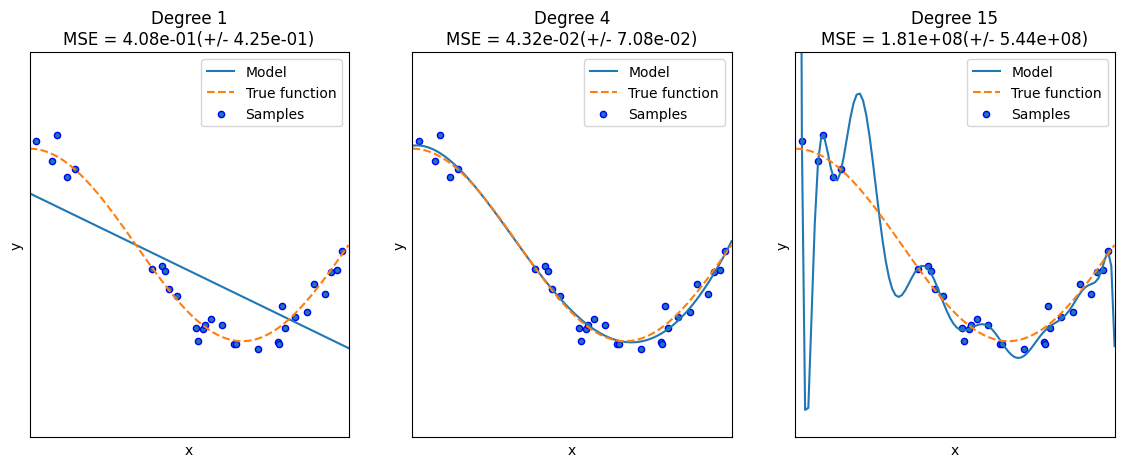

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 점선으로 표현된 것은 X,y의 코사인 곡선이다
- 각각 1차,4차,15차일 때의 그래프이다. 15차에서는 과적합된 것을 볼 수 있다
- MSE는 degree가 4일 때 가장 작다. 이 때 가장 뛰어난 예측성능을 가진다고 볼 수 있다

### 편향-분산 트레이드오프(Bias-Variance Trade off)
- 고편향성: 매우 단순화되어 지나치게 한 방향으로 치우친 경향. 앞 그래프 중 degree1
- 고분산성: 학습 데이터 하나하나의 특성을 반영하여 매우 복잡한 모양. 지나치게 높은 변동성. 앞 그래프 중 degree15
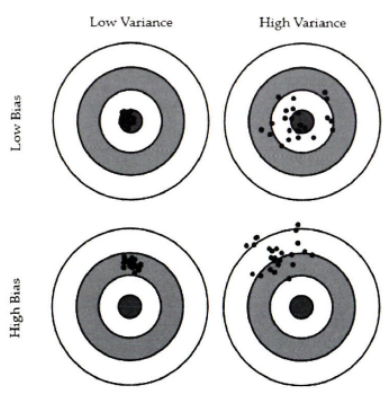
---
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.
- 과소적합:편향이 높고 분산은 낮다
- 과적합:  분산이 높고 편향이 낮다

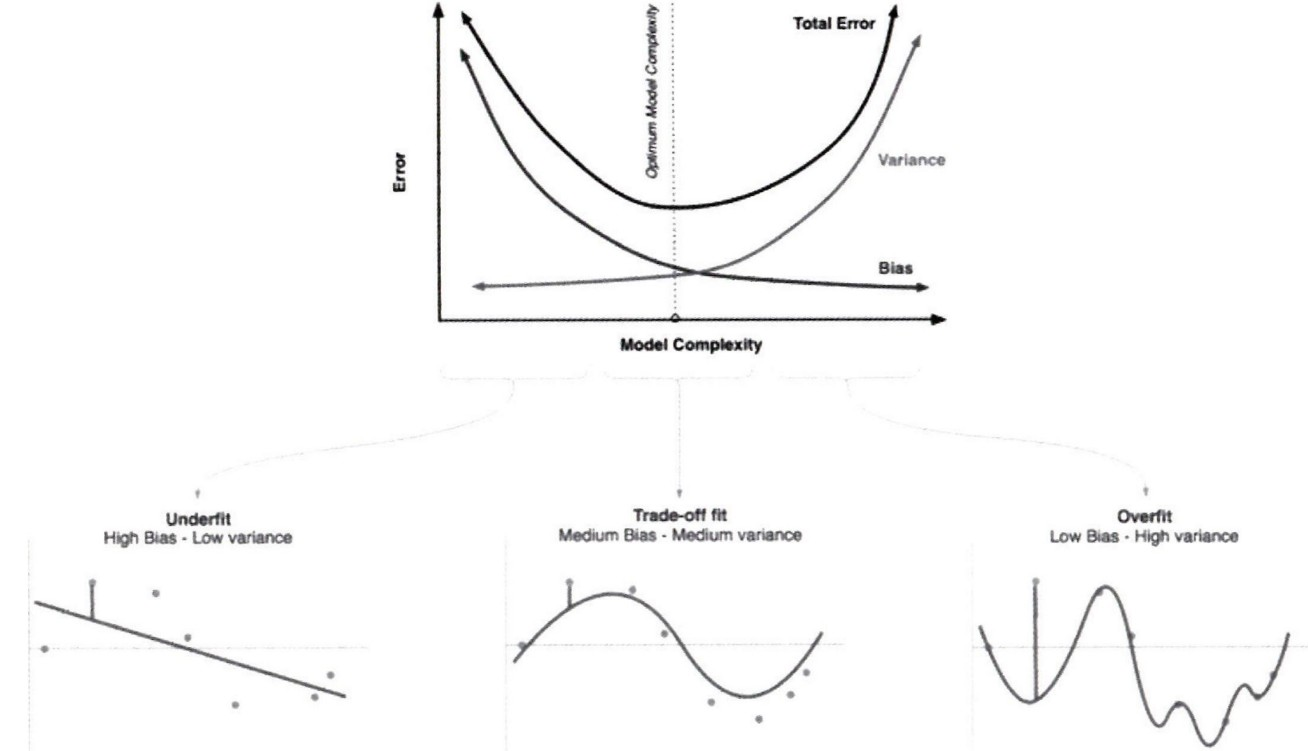
- 골디락스 지점: 전체 오류가 가장 낮아지는 지점

- 편향과 분산이 서로 트레이드오프를 이루며 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다

